In [1]:
#Useful imports
import sys
sys.path.append("../")

#Importing Metropolis-Hastings algorithms
from pyACC.Sampler import metropolis_hastings
from pyACC.Sampler import general_metropolis_hastings

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("MCMC - Metropolis-Hastings algorithm")

In [2]:
# Define the target distribution (standard Gaussiann, i.e. with mean 0 and standard deviation 1)
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi) 

In [3]:
# Proposal distribution: Gaussian with mean=current_state, std_dev=1
def gaussian_proposal(current_state, proposed_sd):
    return np.random.normal(current_state, proposed_sd)  

# Define parameters
initial_state = 0.1 # Initial state
num_samples = 800000  # Number of samples to generate
proposed_sd = 1

# Generate samples using Metropolis-Hastings algorithm
samples, efficiency_counter = metropolis_hastings(target_distribution, initial_state, num_samples, gaussian_proposal, proposed_sd)

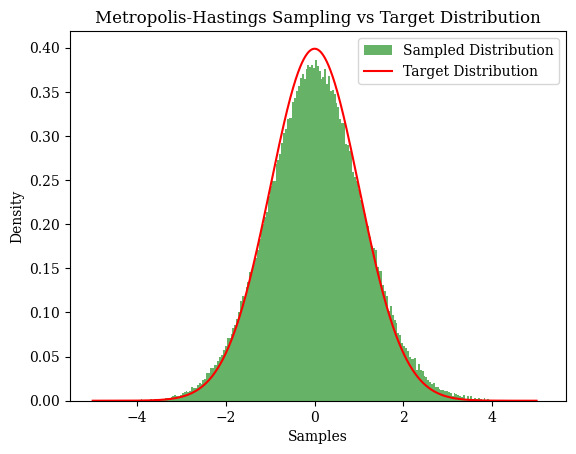

In [4]:
# Plot histogram of samples
plt.hist(samples, bins=230, density=True, alpha=0.6, color='g', label='Sampled Distribution')

# Plot target distribution curve
x_values = np.linspace(-5, 5, 1000)
target_values = target_distribution(x_values)
plt.plot(x_values, target_values, color='r', label='Target Distribution')

# Add title and labels
plt.title('Metropolis-Hastings Sampling vs Target Distribution')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [5]:
#Efficiency check
print('Number of wanted samples: ', num_samples)
print('Number of point taken: ', efficiency_counter)
print('Efficiency (%): ', efficiency_counter/num_samples*100)

2024-07-02 16:36:22.165828 :: MCMC - Metropolis-Hastings algorithm  :: Number of wanted samples:  800000
2024-07-02 16:36:22.166166 :: MCMC - Metropolis-Hastings algorithm  :: Number of point taken:  561590
2024-07-02 16:36:22.166447 :: MCMC - Metropolis-Hastings algorithm  :: Efficiency (%):  70.19875


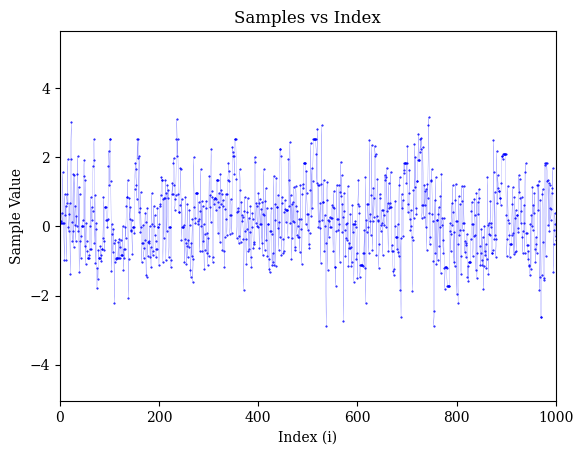

In [6]:
# Plot each point of the samples array against its index to estimate EFFICIENCY
plt.plot(range(len(samples)), samples, marker='o', linestyle='-', color='b' , linewidth=0.1, markersize=0.5)

# Add title and labels
plt.title('Samples vs Index')
plt.xlabel('Index (i)')
plt.ylabel('Sample Value')
plt.xlim(0, 1000)
# Show plot
plt.show()


Burn in of 25 points?

In [7]:
#Autocorrelation time
def autocorr_time(points):
    '''
    The following line calculates the autocorrelation function (ACF) of the MCMC chain samples. 
    It uses NumPy's correlate function to compute the cross-correlation of the chain with itself, 
    after subtracting the mean from each sample. 
    The mode='full' parameter specifies that the output should have the same length as the longer input array, 
    resulting in the full autocorrelation function.
    '''
    acf = np.correlate(points - np.mean(points), points - np.mean(points), mode='full')
    '''
    This line normalizes the autocorrelation function by dividing it by its maximum value.
    This ensures that the autocorrelation values are scaled between 0 and 1.
    '''
    acf = acf / acf.max()

    '''
    This line computes the autocorrelation time estimate by finding the lag at which 
    the autocorrelation function drops below 1/e​, which is approximately 37% of its maximum value. 
    It uses NumPy's argmax function to find the index of the first element in the autocorrelation
    function array that satisfies the condition.
    '''
    return np.argmax(acf < 1/np.e)

autocorr_time_estimate = autocorr_time(samples)
print("Autocorrelation Time Estimate:", autocorr_time_estimate)

2024-07-02 16:46:15.773084 :: MCMC - Metropolis-Hastings algorithm  :: Autocorrelation Time Estimate: 0


**GENERAL MCMC ALGORITH**

In [8]:
# Example general target distribution function
def target_distribution(x, *args, **kwargs):
    # Example: Gaussian distribution with unknown mean and standard deviation
    mu = kwargs.get('mu', 0)  # Default mean is 0 if not provided
    sigma = kwargs.get('sigma', 1)  # Default standard deviation is 1 if not provided
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))


In [9]:
# Example general proposal distribution function
def gaussian_proposal(current_state, proposal_sd, *args, **kwargs):
    return np.random.normal(current_state, proposal_sd)

In [10]:
# Define parameters
initial_state = 0
num_samples = 900000
proposal_sd = 1

In [11]:
# Generate samples using general Metropolis-Hastings algorithm
samples, efficiency_counter = general_metropolis_hastings(target_distribution, gaussian_proposal, initial_state, num_samples, proposal_sd, mu=0, sigma=1)

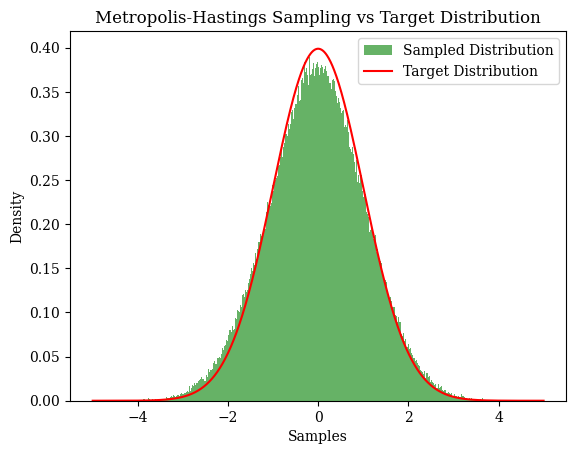

In [12]:
# Plot histogram of samples
plt.hist(samples, bins=400, density=True, alpha=0.6, color='g', label='Sampled Distribution')

# Plot target distribution curve
x_values = np.linspace(-5, 5, 1000)
target_values = target_distribution(x_values, mu=0, sigma=1)
plt.plot(x_values, target_values, color='r', label='Target Distribution')

# Add title and labels
plt.title('Metropolis-Hastings Sampling vs Target Distribution')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

In [13]:
#Efficiency check
print('Number of wanted samples: ', num_samples)
print('Number of point generated: ', efficiency_counter)
print('Efficiency (%): ', efficiency_counter/num_samples*100)

2024-07-02 16:46:37.995966 :: MCMC - Metropolis-Hastings algorithm  :: Number of wanted samples:  900000
2024-07-02 16:46:37.996522 :: MCMC - Metropolis-Hastings algorithm  :: Number of point generated:  631679
2024-07-02 16:46:37.996727 :: MCMC - Metropolis-Hastings algorithm  :: Efficiency (%):  70.18655555555556
